In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [7]:
df=pd.read_csv("train.csv")

In [8]:
print(df.shape)

(42000, 785)


In [9]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [10]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data=df.values

In [13]:
print(data.shape)

(42000, 785)


In [14]:
print(type(data))

<class 'numpy.ndarray'>


In [15]:
x=data[:, 1:]
y=data[:,0]

In [16]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
print(y)

[1 0 1 ... 7 6 9]


In [18]:
#trian test split
split=int(0.8* x.shape[0])

In [19]:
split

33600

In [20]:
x_train=x[:split,:]
y_train=y[:split]

In [21]:
x_test=x[split:,:]

In [22]:
y_test=y[split:]

In [23]:
print(x_train.shape,y_train.shape)

(33600, 784) (33600,)


In [24]:
print(x_test.shape,y_test.shape)

(8400, 784) (8400,)


In [25]:
#visualise samples

In [26]:
def drawimg(sample):
    #reshape that img
    img=sample.reshape((28,28))
    plt.imshow(img)
    plt.show()

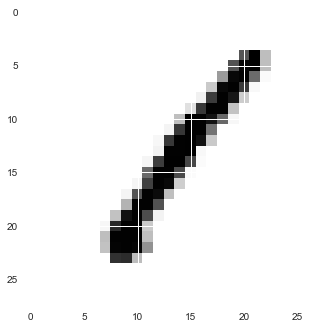

1


In [29]:
drawimg(x_train[0])
print(y_train[0])

In [32]:
def dis(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(x,y,querypoint,k=5):
    # pick k nearest neighbours for every point in x
    vals=[]
    for i in range(x.shape[0]):
        #compute distance
        d=dis(querypoint,x[i])
        vals.append((d,y[i]))
    print(vals) 
    #sort the array and find k nearest points
    vals=sorted(vals)
    vals=vals[:k]
    #majority vote   
    vals=np.array(vals)
    newval=np.unique(vals[:, 1],return_counts=True)
    #print(newval)
    #index of maxcount
    index=newval[1].argmax()
    #mapping this index with my data
    pred=newval[0][index]
    return pred


In [33]:
#distance formula between two numpy arrays euclidean distance

#make predictions over test img
pred=knn(x_train,y_train,x_test[1])

[(3063.6373806310694, 1), (3215.8351947822202, 0), (2665.426419918584, 1), (2730.461499453893, 4), (3419.664895863336, 0), (2323.2132919729947, 0), (2292.3505403842582, 7), (2807.580274898654, 3), (2435.0706355257953, 5), (2831.5389808370996, 3), (2427.9402793314334, 8), (2484.34739921775, 9), (2768.161844979444, 1), (2929.754767894405, 3), (3116.251915362428, 3), (2679.869959531619, 1), (3093.7960501623243, 2), (2683.8936268041625, 0), (2407.78923496223, 7), (3270.9490977390647, 5), (2673.5001402655657, 8), (2894.9552673573385, 6), (3198.5135610154916, 2), (3054.5641260251846, 0), (3004.130989154767, 2), (2883.544693601956, 3), (2651.0007544321825, 6), (2743.21836535118, 9), (1978.9578065234236, 9), (2192.2869337748652, 7), (2808.6293810326774, 8), (2472.094456124199, 9), (2136.5050900945685, 4), (2054.8503595152615, 9), (2565.1405419586663, 2), (2720.062315462644, 1), (2801.9370085710348, 3), (2894.6041180099223, 1), (2970.417142422929, 1), (2217.126518717414, 4), (2345.433648603175,

In [34]:
pred

7.0

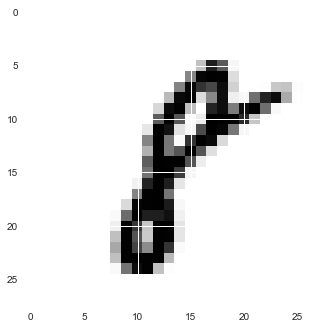

In [36]:
drawimg(x_test[25])